## NBA Player Statistics — Descriptive Analysis
### Team TSIAUF — Sanzhar Ilichbekov, Nurbekov Mirlan, Aydraliev Atai.

In this notebook, we explore the cleaned dataset. The goal is to understand the distribution of the data and identify key patterns in player performance. We will calculate statistical summaries, analyze correlations between variables, and identify top-performing players.

This analysis helps us understand which factors are most important before we build our predictive models in the next stage.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"../data/cleaned_player_stats_for_model.csv")
df.head()

,firstName,lastName,personId,gameId,gameDateTimeEst,playerteamCity,playerteamName,opponentteamCity,opponentteamName,win,...,reboundsDefensive,reboundsOffensive,reboundsTotal,foulsPersonal,turnovers,plusMinusPoints,gameYear,gameMonth,efficiency,points_per36
0,Chris,Paul,101108,22500300,2025-11-29 17:00:00+00:00,14,5,6,17,0,...,2.0,0.0,2.0,2.0,0.0,-2.0,2025.0,11.0,6.0,0.000000
1,D'Angelo,Russell,1626156,22500300,2025-11-29 17:00:00+00:00,6,17,14,5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,2025.0,11.0,0.0,0.000000
2,Kris,Dunn,1627739,22500300,2025-11-29 17:00:00+00:00,14,5,6,17,0,...,3.0,0.0,3.0,2.0,1.0,8.0,2025.0,11.0,12.0,6.654344
3,Ivica,Zubac,1627826,22500300,2025-11-29 17:00:00+00:00,14,5,6,17,0,...,9.0,2.0,11.0,5.0,2.0,4.0,2025.0,11.0,34.0,18.225420
4,John,Collins,1628381,22500300,2025-11-29 17:00:00+00:00,14,5,6,17,0,...,4.0,0.0,4.0,2.0,1.0,1.0,2025.0,11.0,28.0,20.982515


### General Statistics
We calculate the average, median, and standard deviation for key performance indicators like points, assists, and rebounds. This gives us a baseline for what a "normal" NBA performance looks like.

In [7]:
key_stats = ['points', 'assists', 'reboundsTotal', 'efficiency', 'numMinutes']

display(df[key_stats].describe().round(2))

,points,assists,reboundsTotal,efficiency,numMinutes
count,352749.00,352749.00,352749.00,352749.00,352749.00
mean,8.34,1.85,3.33,13.45,20.74
std,8.64,2.45,3.49,12.43,10.52
min,0.00,0.00,0.00,-4.00,0.00
25%,0.00,0.00,0.00,2.00,13.00
50%,6.00,1.00,2.00,11.00,21.00
75%,13.00,3.00,5.00,21.00,29.00
max,73.00,25.00,31.00,94.00,64.00


### Distribution of Points

We visualize how points are distributed across all games. This histogram allows us to see the frequency of high-scoring games versus low-scoring games. It helps us understand the spread of the data.

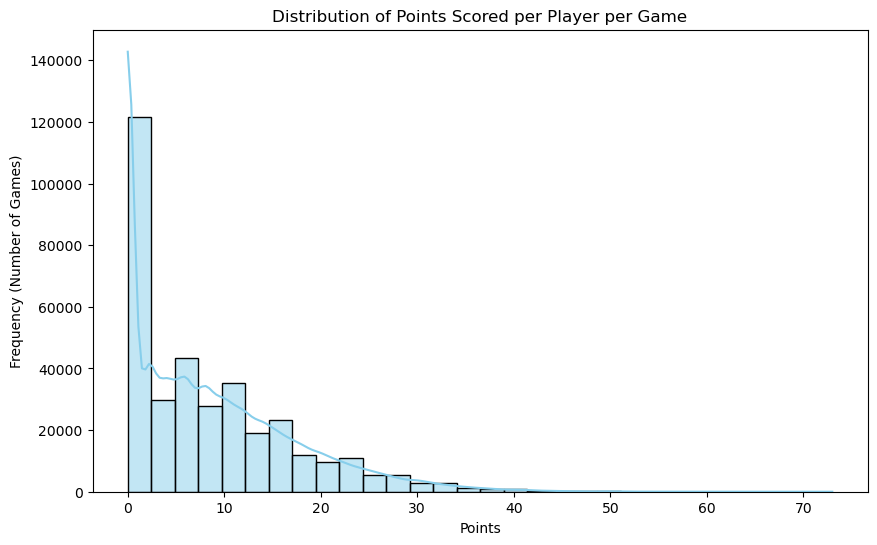

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['points'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Points Scored per Player per Game')
plt.xlabel('Points')
plt.ylabel('Frequency (Number of Games)')
plt.show()

### Correlation Matrix
We use a correlation matrix to identify relationships between different variables. A value close to 1.0 means a strong positive relationship.

We are particularly interested in:
1.  Which stats correlate most with **Efficiency**?
2.  Is there a strong link between individual stats and **Winning**?

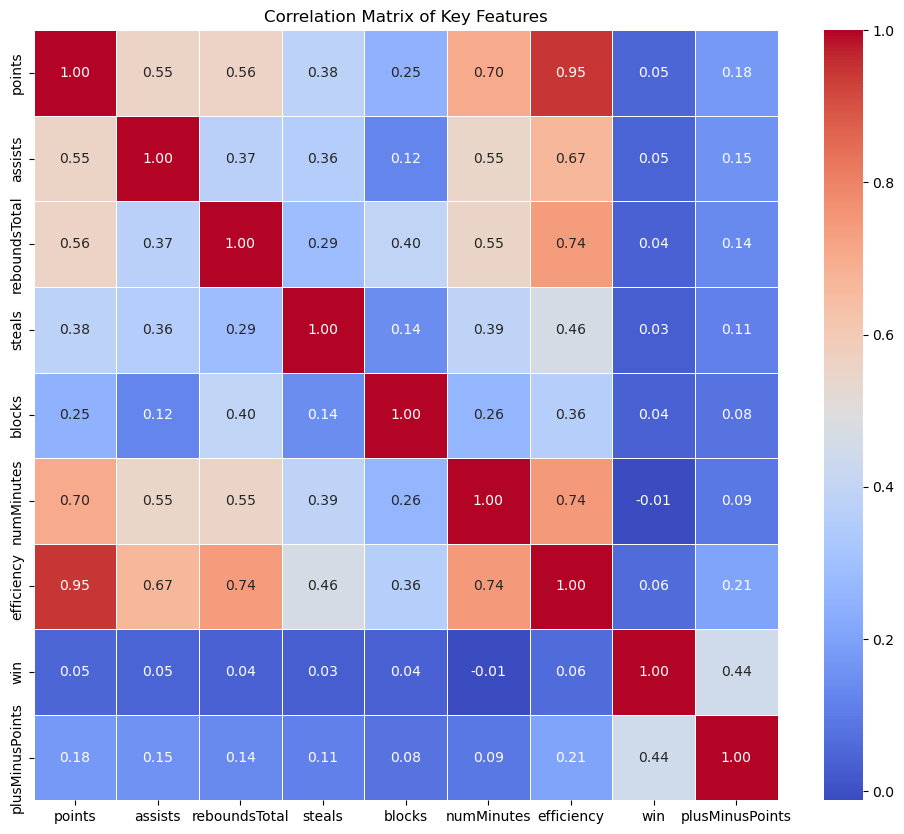

In [12]:
corr_cols = ['points', 'assists', 'reboundsTotal', 'steals', 'blocks', 'numMinutes', 'efficiency', 'win', 'plusMinusPoints']

corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Key Features")
plt.show()

### Top Performing Players
We group the data by player name to identify the leaders in scoring and efficiency. To ensure the results are meaningful, we only consider players who average at least 20 minutes per game. This filters out players with very few games or low playing time who might have skewed statistics.

In [15]:
player_stats = df.groupby(['firstName', 'lastName'])[['points', 'assists', 'reboundsTotal', 'efficiency', 'numMinutes']].mean()

active_players = player_stats[player_stats['numMinutes'] > 20]

print("Top 10 Players by Average Points:")
display(active_players.sort_values(by='points', ascending=False).head(10))

print("\nTop 10 Players by Average Efficiency:")
display(active_players.sort_values(by='efficiency', ascending=False).head(10))

Top 10 Players by Average Points:


,,points,assists,reboundsTotal,efficiency,numMinutes
firstName,lastName,,,,,
Luka,Doncic,27.730700,7.811490,8.283662,41.671454,34.594309
Giannis,Antetokounmpo,26.452005,5.455650,10.735115,41.840826,33.328578
Kevin,Durant,26.053161,4.831897,6.666667,36.620690,35.006681
Stephen,Curry,25.925736,5.594110,4.874520,35.062740,32.822714
James,Harden,25.418440,8.619385,6.113475,38.131206,35.661738
LeBron,James,24.928922,7.569853,7.667892,38.571078,35.347083
Damian,Lillard,24.453125,6.286458,4.040365,33.371094,35.362187
Donovan,Mitchell,24.251506,4.564759,4.234940,32.043675,33.315964
Trae,Young,23.758741,9.167832,3.286713,33.349650,33.687605



Top 10 Players by Average Efficiency:


,,points,assists,reboundsTotal,efficiency,numMinutes
firstName,lastName,,,,,
Giannis,Antetokounmpo,26.452005,5.455650,10.735115,41.840826,33.328578
Luka,Doncic,27.730700,7.811490,8.283662,41.671454,34.594309
Nikola,Jokic,22.200908,7.309875,10.962543,39.489217,32.110800
LeBron,James,24.928922,7.569853,7.667892,38.571078,35.347083
James,Harden,25.418440,8.619385,6.113475,38.131206,35.661738
Victor,Wembanyama,21.756944,3.631944,10.381944,36.944444,30.208889
Kevin,Durant,26.053161,4.831897,6.666667,36.620690,35.006681
Anthony,Davis,22.843537,2.617687,9.891156,36.533333,34.012136
Joel,Embiid,23.561175,3.096248,9.464927,35.323002,31.287439


### Win vs. Loss Analysis

We compare the average statistics of players in games won versus games lost. This helps us identify the "winning factors." For example, do winning teams generally have significantly higher assists or rebounds?

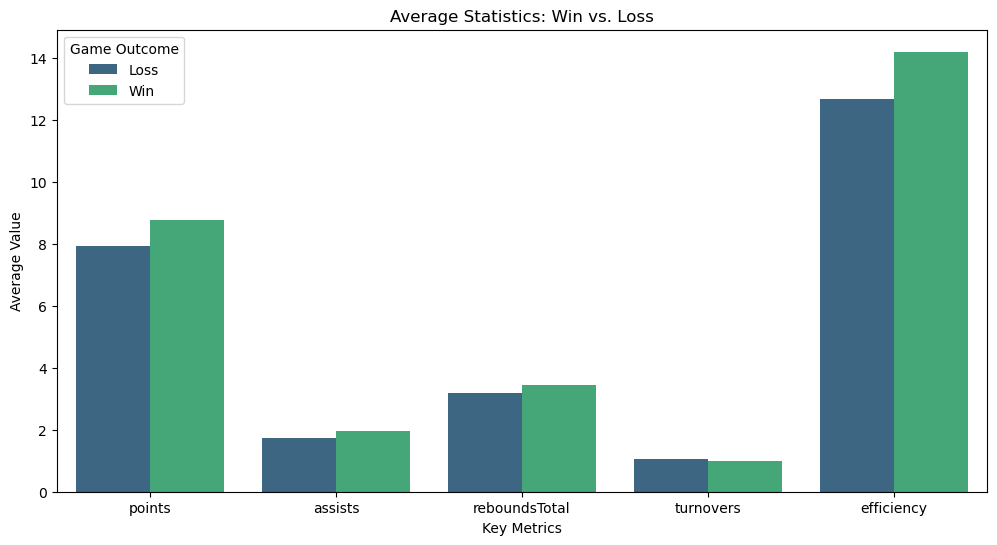

In [19]:
win_stats = df.groupby('win')[['points', 'assists', 'reboundsTotal', 'turnovers', 'efficiency']].mean().reset_index()

win_stats['win'] = win_stats['win'].map({0: 'Loss', 1: 'Win'})

melted_stats = win_stats.melt(id_vars='win', var_name='Statistic', value_name='Average Value')

plt.figure(figsize=(12, 6))
sns.barplot(data=melted_stats, x='Statistic', y='Average Value', hue='win', palette='viridis')
plt.title('Average Statistics: Win vs. Loss')
plt.ylabel('Average Value')
plt.xlabel('Key Metrics')
plt.legend(title='Game Outcome')
plt.show()